<a href="https://colab.research.google.com/github/ADRIANVM117/data-science-portfolio/blob/main/AMZN_STOCK_STATS_AND_PREDICTIVE_MODEL/AMZN_Statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Estadistico de la acción AMZN

## índice del Análisis Estadistico de AMZN


1. <b>Estadísticas Descriptivas </b>

- Cálculo de medidas básicas: media, mediana, desviación estándar, mínimo, máximo.
Cálculo de rendimientos diarios y su descripción estadística.
2. <b> Distribución de los Precios y Rendimientos </b>
- Visualización de la distribución de precios de cierre y rendimientos.
Ajuste a distribuciones conocidas (como normal, log-normal, etc.).
Prueba de normalidad usando Shapiro-Wilk o Jarque-Bera.
3. <b>Volatilidad </b>
- álculo de la volatilidad histórica: Desviación estándar de los rendimientos diarios.
Volatilidad anualizada.
Visualización de la volatilidad a lo largo del tiempo.
4. <b> Modelos de Series de Tiempo </b>
- Análisis de estacionariedad usando la prueba ADF (Augmented Dickey-Fuller).
Autocorrelación: Cálculo de la función de autocorrelación (ACF) y autocorrelación parcial (PACF).
Creación de un modelo de ARIMA para modelar los precios de cierre o rendimientos de AMZN.
5. <b> Pruebas de Hipótesis </b>
- Prueba t de Student: Comparación de la media de los rendimientos diarios con una media hipotética.
Prueba de diferencia de medias: Comparación de medias entre diferentes periodos de tiempo (por ejemplo, rendimiento mensual vs. rendimiento anual).
6. <b>Conclusiones </b>

- Resumen de hallazgos clave.
Implicaciones de los resultados estadísticos para el análisis de la acción de AMZN.

# <b>Importación de datos, Bibliotecas, procesamiento

In [1]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=IBM&apikey=#############'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'IBM', '3. Last Refreshed': '2025-01-31', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-01-31': {'1. open': '256.05', '2. high': '257.235', '3. low': '251.89', '4. close': '255.7', '5. adjusted close': '255.7', '6. volume': '7203519', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2025-01-30': {'1. open': '250.0', '2. high': '261.8', '3. low': '247.01', '4. close': '258.27', '5. adjusted close': '258.27', '6. volume': '15381890', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2025-01-29': {'1. open': '225.62', '2. high': '229.47', '3. low': '223.73', '4. close': '228.63', '5. adjusted close': '228.63', '6. volume': '7079804', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2025-01-28': {'1. open': '224.32', '2. high': '225.77', '3. low': '221.77', '4. close': '225.66', '5. adjusted close': '22

In [6]:

import requests
import pandas as pd

# Configuración
config = {
    "alpha_vantage": {
        "key": "#############",  # Tu clave API
        "symbol": "AMZN",  # Símbolo de la acción (puedes cambiarlo por el que necesites)
        "outputsize": "full",  # Tamaño completo de los datos históricos
        "key_adjusted_close": "5. adjusted close",  # Clave para el precio ajustado
    },
}

# Función para obtener los datos de Alpha Vantage
def get_adjusted_close(config):
    # Construir la URL de la API de Alpha Vantage
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={config['alpha_vantage']['symbol']}&apikey={config['alpha_vantage']['key']}&outputsize={config['alpha_vantage']['outputsize']}"

    # Realizar la solicitud GET
    response = requests.get(url)

    # Verificar que la solicitud fue exitosa
    if response.status_code == 200:
        data = response.json()

        # Imprimir la respuesta completa para verificar su estructura
        # print("Respuesta de la API:", data)

        # Extraer la clave de los precios ajustados
        adjusted_close = data['Time Series (Daily)']

        # Crear un DataFrame con solo la columna "adjusted close"
        adjusted_data = {date: float(info[config['alpha_vantage']['key_adjusted_close']])
                         for date, info in adjusted_close.items()}

        # Convertir a DataFrame con columnas 'Date' y 'Adjusted Close'
        df = pd.DataFrame(list(adjusted_data.items()), columns=['Date', 'Adjusted Close'])

        # Convertir la columna 'Date' a formato datetime
        df['Date'] = pd.to_datetime(df['Date'])

        # Ordenar por fecha
        df = df.sort_values('Date')

        # Filtrar para que solo incluya las fechas desde el 2022-01-01 hasta el 2025-01-31
        start_date = '2022-01-01'
        end_date = '2025-01-31'

        df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

        return df
    else:
        print("Error en la solicitud:", response.status_code)
        return None

# Obtener el DataFrame con el precio ajustado
df_adjusted = get_adjusted_close(config)

# Mostrar el DataFrame con el precio ajustado
if df_adjusted is not None:
    print(df_adjusted.head())


          Date  Adjusted Close
772 2022-01-03        170.4045
771 2022-01-04        167.5220
770 2022-01-05        164.3570
769 2022-01-06        163.2540
768 2022-01-07        162.5540


In [7]:
df_adjusted.set_index('Date', inplace=True)
df=df_adjusted.copy()

# **Estadísticas Descriptivas**
- Cálculo de medidas básicas: media, mediana, desviación estándar, mínimo, máximo. Cálculo de rendimientos diarios y su descripción estadística.

## Estadisticas Descriptivas


In [8]:
# Estadísticas descriptivas
df['Adjusted Close'].describe()

# Cálculo de rendimientos diarios
df['Daily Return'] = df['Adjusted Close'].pct_change()

# Estadísticas de rendimientos
df['Daily Return'].describe()


,Daily Return
count,772.000000
mean,0.000717
std,0.023937
min,-0.140494
25%,-0.012333
50%,0.000378
75%,0.014164
max,0.135359


## **Distribución de los Precios y Rendimientos:**



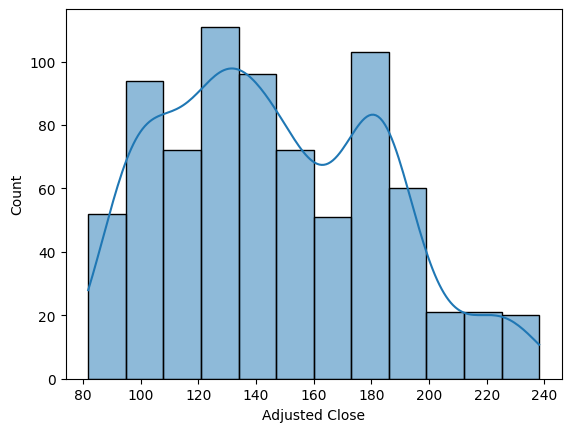

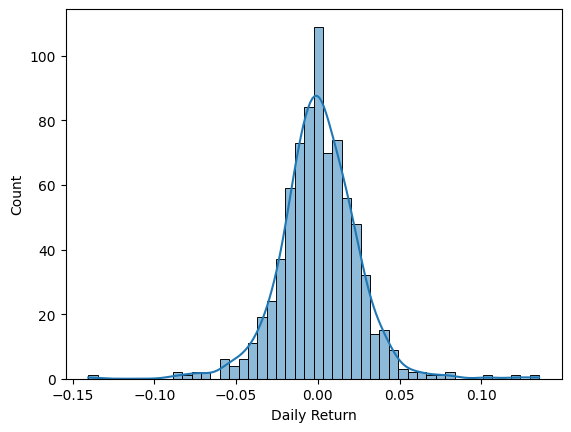

Shapiro-Wilk: Estadístico=0.9557878496071113, p-valor=1.7725291119868544e-14
Log Adjusted Close: No pasa la prueba de normalidad (p-valor=0.0000)
Log Rendimientos: No pasa la prueba de normalidad (p-valor=0.0000)


In [15]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Histograma de precios ajustados
sns.histplot(df['Adjusted Close'], kde=True)
plt.show()

# Histograma de rendimientos diarios
sns.histplot(df['Daily Return'].dropna(), kde=True)
plt.show()

# Prueba de normalidad - Shapiro-Wilk
stat, p_value = stats.shapiro(df['Daily Return'].dropna())
print(f'Shapiro-Wilk: Estadístico={stat}, p-valor={p_value}')


from scipy import stats

# Prueba de Shapiro-Wilk para Log Adjusted Close
stat_log_adj, p_value_log_adj = stats.shapiro(df['Adjusted Close'].dropna())
if p_value_log_adj > 0.05:
    print(f"Log Adjusted Close: Pasa la prueba de normalidad (p-valor={p_value_log_adj:.4f})")
else:
    print(f"Log Adjusted Close: No pasa la prueba de normalidad (p-valor={p_value_log_adj:.4f})")

# Prueba de Shapiro-Wilk para Log Rendimientos
stat_log_rend, p_value_log_rend = stats.shapiro(df['Daily Return'].dropna())
if p_value_log_rend > 0.05:
    print(f"Log Rendimientos: Pasa la prueba de normalidad (p-valor={p_value_log_rend:.4f})")
else:
    print(f"Log Rendimientos: No pasa la prueba de normalidad (p-valor={p_value_log_rend:.4f})")


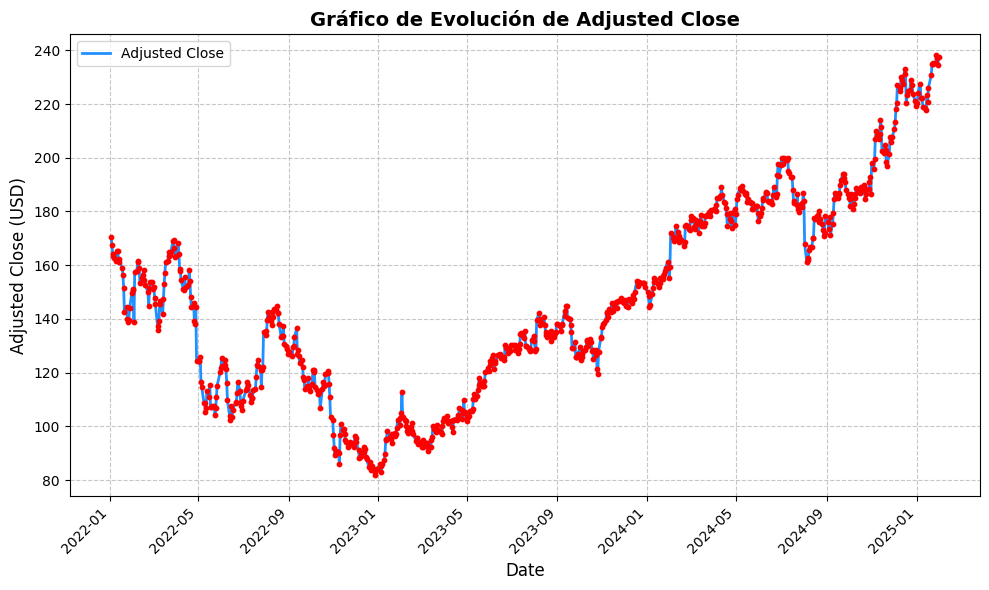

In [10]:
import matplotlib.pyplot as plt

# Mejorar la visualización del gráfico de Adjusted Close
plt.figure(figsize=(10, 6))  # Tamaño de la figura más grande para mejor visualización

# Graficar con una línea, para mostrar la evolución de Adjusted Close
plt.plot(df.index, df['Adjusted Close'], color='dodgerblue', linewidth=2, label='Adjusted Close')

# Mejorar el gráfico con puntos para destacar los valores
plt.scatter(df.index, df['Adjusted Close'], color='red', s=10, zorder=5)  # s ajusta el tamaño de los puntos

# Etiquetas de los ejes
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close (USD)', fontsize=12)

# Título del gráfico
plt.title('Gráfico de Evolución de Adjusted Close', fontsize=14, fontweight='bold')

# Rotar las etiquetas del eje X para mayor claridad
plt.xticks(rotation=45, ha='right')

# Establecer la cuadrícula para facilitar la lectura
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
plt.show()


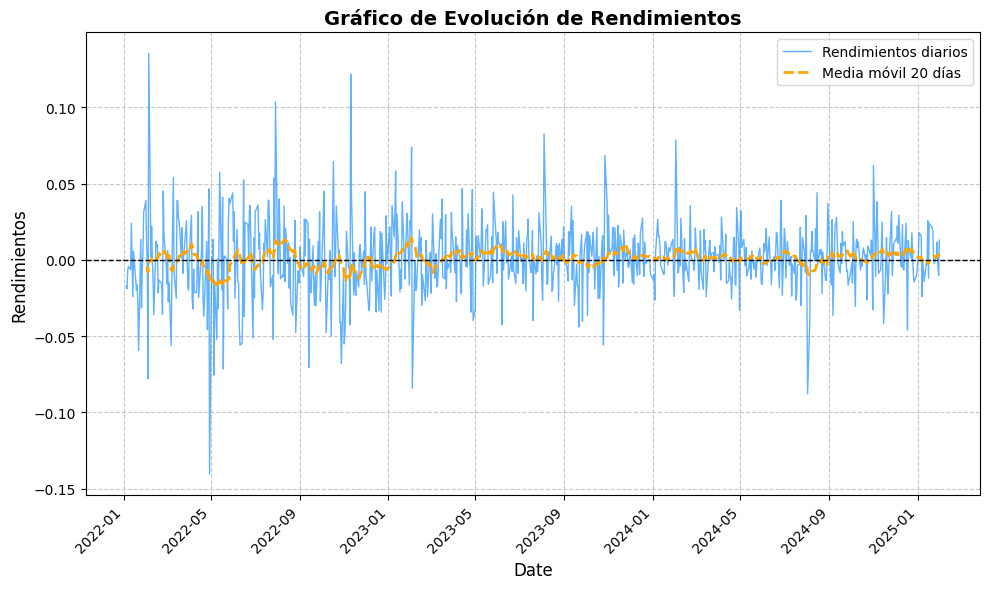

In [13]:
import matplotlib.pyplot as plt

# Graficar los rendimientos con una línea suavizada (media móvil de 20 días)
df['rendimientos_movil'] = df['Daily Return'].rolling(window=20).mean()

plt.figure(figsize=(10, 6))  # Ajuste del tamaño para mayor claridad

# Graficar los rendimientos y la media móvil
plt.plot(df.index, df['Daily Return'], color='dodgerblue', linewidth=1, label='Rendimientos diarios', alpha=0.7)
plt.plot(df.index, df['rendimientos_movil'], color='orange', linewidth=2, label='Media móvil 20 días', linestyle='--')

# Agregar una línea horizontal en 0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Etiquetas de los ejes
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rendimientos', fontsize=12)

# Título del gráfico
plt.title('Gráfico de Evolución de Rendimientos', fontsize=14, fontweight='bold')

# Rotar las etiquetas del eje X para mayor claridad
plt.xticks(rotation=45, ha='right')

# Establecer la cuadrícula para facilitar la lectura
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar una leyenda
plt.legend()

# Ajustar el diseño para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()



<ipython-input-14-74db6d67cac1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_20_days['rendimientos_movil'] = df_last_20_days['Daily Return'].rolling(window=5).mean()


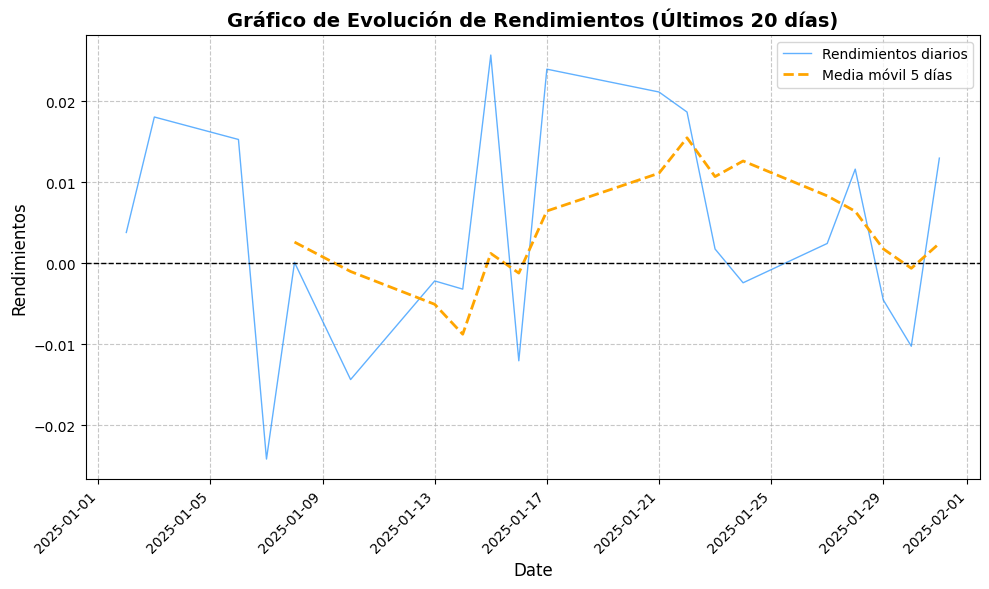

In [14]:
import matplotlib.pyplot as plt

# Filtrar los últimos 20 días de datos
df_last_20_days = df[-20:]

# Graficar los rendimientos con una línea suavizada (media móvil de 5 días para los últimos 20 días)
df_last_20_days['rendimientos_movil'] = df_last_20_days['Daily Return'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))  # Ajuste del tamaño para mayor claridad

# Graficar los rendimientos y la media móvil
plt.plot(df_last_20_days.index, df_last_20_days['Daily Return'], color='dodgerblue', linewidth=1, label='Rendimientos diarios', alpha=0.7)
plt.plot(df_last_20_days.index, df_last_20_days['rendimientos_movil'], color='orange', linewidth=2, label='Media móvil 5 días', linestyle='--')

# Agregar una línea horizontal en 0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Etiquetas de los ejes
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rendimientos', fontsize=12)

# Título del gráfico
plt.title('Gráfico de Evolución de Rendimientos (Últimos 20 días)', fontsize=14, fontweight='bold')

# Rotar las etiquetas del eje X para mayor claridad
plt.xticks(rotation=45, ha='right')

# Establecer la cuadrícula para facilitar la lectura
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar una leyenda
plt.legend()

# Ajustar el diseño para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### **OBSERVACIONES**


**Este gráfico muestra la evolución de los rendimientos diarios de la acción durante los últimos 20 días, junto con una media móvil de 5 días para suavizar las fluctuaciones.**



1.**Rendimientos diarios:**
- La línea azul muestra las variaciones diarias de los rendimientos, que tienen fluctuaciones amplias en algunos días (por ejemplo, alrededor de las fechas 2025-01-05, 2025-01-13, etc.).
Estas fluctuaciones grandes indican que los rendimientos diarios son muy volátiles, lo cual es común en los mercados financieros, donde los precios pueden cambiar significativamente de un día a otro.
2. **Media móvil de 5 días:**

- La línea naranja discontinua muestra la media móvil de los últimos 5 días, lo que ayuda a suavizar las grandes variaciones diarias y muestra una tendencia más estable.
La media móvil actúa como un filtro que resalta las tendencias a corto plazo sin las fluctuaciones diarias tan extremas. En este gráfico, vemos que la media móvil sigue mejor las tendencias generales de los rendimientos sin ser tan sensible a los picos.

Rendimientos diarios (línea azul):

La línea azul representa los rendimientos diarios de la acción. Los rendimientos diarios se calculan como el cambio porcentual entre el precio ajustado de hoy y el precio ajustado del día anterior.

In [16]:
from scipy import stats

# Prueba de Shapiro-Wilk para Log Adjusted Close
stat_log_adj, p_value_log_adj = stats.shapiro(df['Adjusted Close'].dropna())
if p_value_log_adj > 0.05:
    print(f"Log Adjusted Close: Pasa la prueba de normalidad (p-valor={p_value_log_adj:.4f})")
else:
    print(f"Log Adjusted Close: No pasa la prueba de normalidad (p-valor={p_value_log_adj:.4f})")

# Prueba de Shapiro-Wilk para Log Rendimientos
stat_log_rend, p_value_log_rend = stats.shapiro(df['Daily Return'].dropna())
if p_value_log_rend > 0.05:
    print(f"Log Rendimientos: Pasa la prueba de normalidad (p-valor={p_value_log_rend:.4f})")
else:
    print(f"Log Rendimientos: No pasa la prueba de normalidad (p-valor={p_value_log_rend:.4f})")


Log Adjusted Close: No pasa la prueba de normalidad (p-valor=0.0000)
Log Rendimientos: No pasa la prueba de normalidad (p-valor=0.0000)
